In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [278]:
greendf = pd.read_csv("green_tripdata_201406.csv")
greendf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
0,2,2014-06-01 00:00:00,2014-06-01 07:40:36,N,1,0.0,0.0,-73.865570,40.770863,1,8.00,24.5,0.0,0.5,0.0,7.5,NaN,32.5,1,1.0
1,2,2014-06-01 00:00:00,2014-06-01 15:25:06,N,5,0.0,0.0,-73.928314,40.815762,1,0.94,7.0,0.0,0.0,0.0,0.0,NaN,7.0,2,1.0
2,2,2014-06-01 00:00:00,2014-06-01 02:06:27,N,1,0.0,0.0,-73.929260,40.855412,1,1.12,6.5,0.5,0.5,0.0,0.0,NaN,7.5,2,1.0
3,2,2014-06-01 00:00:00,2014-06-01 23:33:03,N,1,0.0,0.0,-73.997047,40.749828,1,6.97,29.5,0.5,0.5,0.0,0.0,NaN,30.5,2,1.0
4,2,2014-06-01 00:00:00,2014-06-01 13:05:02,N,1,0.0,0.0,-73.948982,40.797092,1,1.04,7.0,0.0,0.5,0.0,0.0,NaN,7.5,2,1.0


In [279]:
greendf.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1337759
Total_amount                   0
Payment_type                   0
Trip_type                      2
dtype: int64

In [280]:
greendf.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
count,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,1.337759e+06,0.0,1.337759e+06,1.337759e+06,1.337757e+06
mean,1.785282e+00,1.086689e+00,-7.378168e+01,4.067223e+01,-7.382534e+01,4.069352e+01,1.446053e+00,3.094938e+00,1.286308e+01,3.609690e-01,4.890328e-01,1.123196e+00,1.274476e-01,NaN,1.496481e+01,1.593110e+00,1.019359e+00
std,4.106268e-01,5.867986e-01,3.342226e+00,1.843176e+00,2.822861e+00,1.556290e+00,1.155615e+00,3.111021e+00,1.101673e+01,3.644602e-01,7.490004e-02,2.415046e+00,1.645343e+00,NaN,1.253453e+01,5.068413e-01,1.377843e-01
min,1.000000e+00,1.000000e+00,-7.744964e+01,0.000000e+00,-7.744963e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+02,-1.000000e+00,-1.500000e+00,-5.380000e+00,-5.330000e+00,NaN,-4.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395802e+01,4.071036e+01,-7.396780e+01,4.071091e+01,1.000000e+00,1.150000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,8.000000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394300e+01,4.074914e+01,-7.394360e+01,4.075226e+01,1.000000e+00,2.100000e+00,1.000000e+01,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,1.150000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391354e+01,4.080524e+01,-7.390689e+01,4.079702e+01,1.000000e+00,3.980000e+00,1.600000e+01,5.000000e-01,5.000000e-01,1.800000e+00,0.000000e+00,NaN,1.850000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.274857e+01,0.000000e+00,4.274861e+01,9.000000e+00,5.000000e+02,3.427500e+03,2.000000e+01,1.500000e+00,5.000000e+02,1.600080e+03,NaN,3.428000e+03,5.000000e+00,2.000000e+00


In [302]:
greendf.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
pickup_day                       object
dropoff_day                      object
pickup_day_no                     int64
dropoff_day_no                    int64
pickup_hour                       int64


In [282]:
# Drop rows which RateCodeID=99
greendf.drop(greendf[greendf['RateCodeID'] == 99].index, inplace = True)

In [283]:
greendf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
0,2,2014-06-01 00:00:00,2014-06-01 07:40:36,N,1,0.0,0.0,-73.865570,40.770863,1,8.00,24.5,0.0,0.5,0.0,7.5,NaN,32.5,1,1.0
1,2,2014-06-01 00:00:00,2014-06-01 15:25:06,N,5,0.0,0.0,-73.928314,40.815762,1,0.94,7.0,0.0,0.0,0.0,0.0,NaN,7.0,2,1.0
2,2,2014-06-01 00:00:00,2014-06-01 02:06:27,N,1,0.0,0.0,-73.929260,40.855412,1,1.12,6.5,0.5,0.5,0.0,0.0,NaN,7.5,2,1.0
3,2,2014-06-01 00:00:00,2014-06-01 23:33:03,N,1,0.0,0.0,-73.997047,40.749828,1,6.97,29.5,0.5,0.5,0.0,0.0,NaN,30.5,2,1.0
4,2,2014-06-01 00:00:00,2014-06-01 13:05:02,N,1,0.0,0.0,-73.948982,40.797092,1,1.04,7.0,0.0,0.5,0.0,0.0,NaN,7.5,2,1.0


In [284]:
# Convert pickup and dropoff column type to datetime
greendf['lpep_pickup_datetime']=pd.to_datetime(greendf['lpep_pickup_datetime'])
greendf['Lpep_dropoff_datetime']=pd.to_datetime(greendf['Lpep_dropoff_datetime'])

In [285]:
# Add pickup/dropoff day and time
greendf['pickup_day']=greendf['lpep_pickup_datetime'].dt.day_name()
greendf['dropoff_day']=greendf['Lpep_dropoff_datetime'].dt.day_name()
greendf['pickup_day_no']=greendf['lpep_pickup_datetime'].dt.weekday
greendf['dropoff_day_no']=greendf['Lpep_dropoff_datetime'].dt.weekday
greendf['pickup_hour']=greendf['lpep_pickup_datetime'].dt.hour
greendf['dropoff_hour']=greendf['Lpep_dropoff_datetime'].dt.hour
greendf['pickup_month']=greendf['lpep_pickup_datetime'].dt.month
greendf['dropoff_month']=greendf['Lpep_dropoff_datetime'].dt.month

In [286]:
# Define 6am-12am as Morning, 12-16pm as Afternoon, 16-22pm as Evening, others as Late night
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [287]:
greendf['pickup_timeofday']=greendf['pickup_hour'].apply(time_of_day)
greendf['dropoff_timeofday']=greendf['dropoff_hour'].apply(time_of_day)

In [288]:
# Calculate haversine distance
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).mi

In [289]:
#Calculate haversine distance
greendf['Haversine_distance'] = greendf.apply(lambda x: cal_distance(x['Pickup_latitude'],x['Pickup_longitude'],x['Dropoff_latitude'],x['Dropoff_longitude'] ), axis=1)

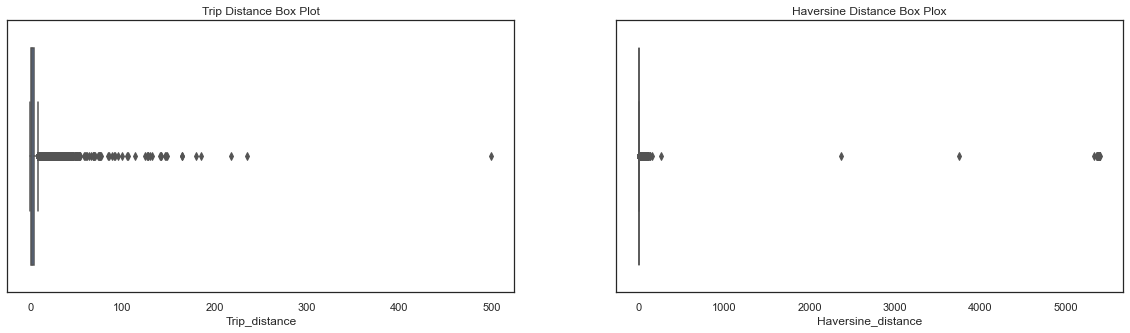

In [290]:
# Check Haversine distance outliers
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Trip Distance Box Plot')
ax=sns.boxplot(x=greendf['Trip_distance'],ax=ax5)
ax6.set_title('Haversine Distance Box Plox')
ax=sns.boxplot(x=greendf['Haversine_distance'],ax=ax6)

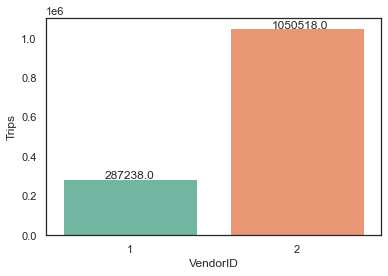

In [291]:
vendor=sns.countplot(x ='VendorID', data = greendf, palette = "Set2")
plt.xlabel('VendorID')
plt.ylabel('Trips')
for p in vendor.patches:
        vendor.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))

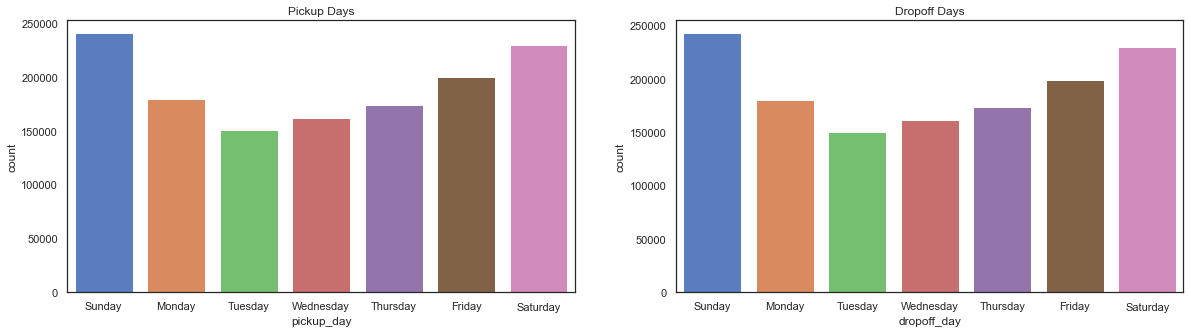

In [292]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=greendf,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=greendf,ax=ax2)

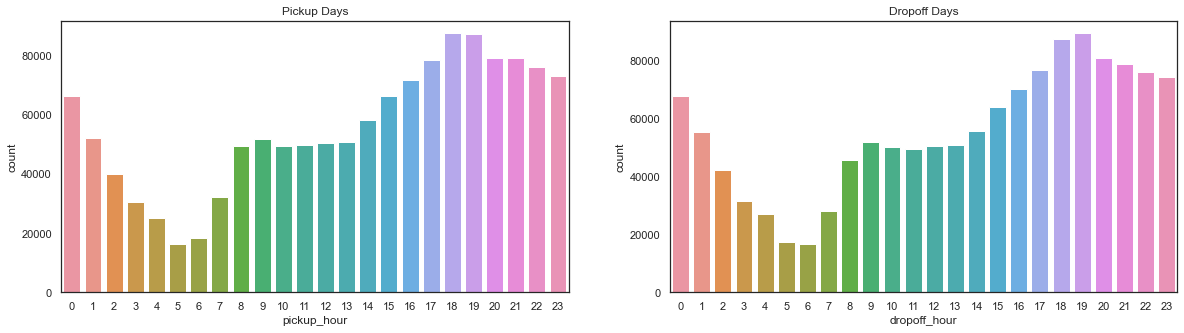

In [293]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=greendf,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=greendf,ax=ax10)

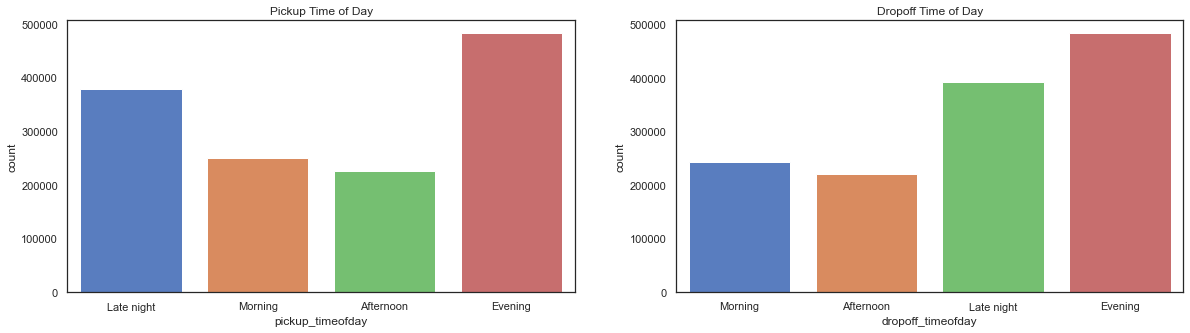

In [294]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=greendf,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=greendf,ax=ax4)

<AxesSubplot:xlabel='VendorID', ylabel='Trip_distance'>

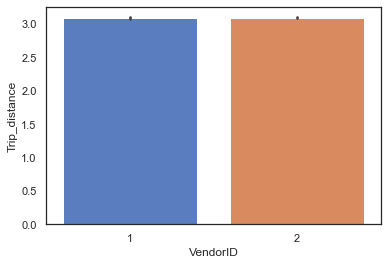

In [295]:
# Distance per Vendor
sns.barplot(y='Trip_distance',x='VendorID',data=greendf,estimator=np.mean)

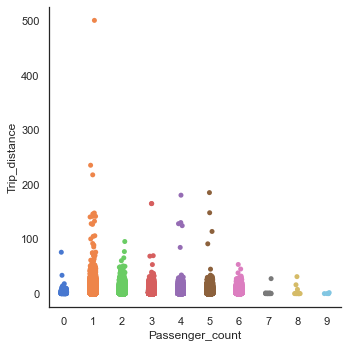

In [296]:
# Distance per passenger count
sns.catplot(y='Trip_distance',x='Passenger_count',data=greendf,kind='strip')

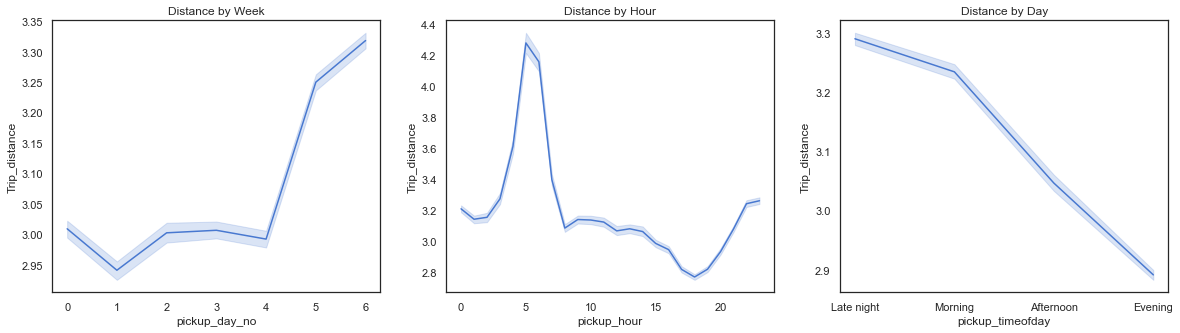

In [297]:
# Distance by week, hour, day
figure,(ax11,ax12, ax13)=plt.subplots(ncols=3,figsize=(20,5))
ax11.set_title('Distance by Week')
ax=sns.lineplot(x='pickup_day_no',y='Trip_distance',data=greendf, ax=ax11)
ax12.set_title('Distance by Hour')
ax=sns.lineplot(x='pickup_hour',y='Trip_distance',data=greendf, ax=ax12)
ax13.set_title('Distance by Day')
ax=sns.lineplot(x='pickup_timeofday',y='Trip_distance',data=greendf, ax=ax13)

In [306]:
greendf['Trip_Duration']=greendf['Lpep_dropoff_datetime']-greendf['lpep_pickup_datetime']
greendf['Trip_Duration']=greendf['Trip_Duration'].dt.total_seconds()
greendf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Haversine_distance,Trip_Duration
0,2,2014-06-01,2014-06-01 07:40:36,N,1,0.0,0.0,-73.865570,40.770863,1,...,6,6,0,7,6,6,Late night,Morning,5378.990156,27636.0
1,2,2014-06-01,2014-06-01 15:25:06,N,5,0.0,0.0,-73.928314,40.815762,1,...,6,6,0,15,6,6,Late night,Afternoon,5382.790331,55506.0
2,2,2014-06-01,2014-06-01 02:06:27,N,1,0.0,0.0,-73.929260,40.855412,1,...,6,6,0,2,6,6,Late night,Late night,5383.346088,7587.0
3,2,2014-06-01,2014-06-01 23:33:03,N,1,0.0,0.0,-73.997047,40.749828,1,...,6,6,0,23,6,6,Late night,Late night,5385.483821,84783.0
4,2,2014-06-01,2014-06-01 13:05:02,N,1,0.0,0.0,-73.948982,40.797092,1,...,6,6,0,13,6,6,Late night,Afternoon,5383.614087,47102.0


In [307]:
greendf.shape

(1337756, 32)

# Set Training data and Test data

In [298]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [308]:
train_df, test_df = train_test_split(greendf, test_size=0.3, random_state=25)
train_df.shape, test_df.shape

((936429, 32), (401327, 32))

In [309]:
train_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Haversine_distance,Trip_Duration
699119,2,2014-06-16 13:03:51,2014-06-16 13:15:06,N,1,-73.936501,40.849419,-73.930954,40.858013,1,...,0,0,13,13,6,6,Afternoon,Afternoon,0.660796,675.0
1227189,2,2014-06-28 15:21:15,2014-06-28 15:26:31,N,1,-73.980286,40.676540,-73.978004,40.685013,1,...,5,5,15,15,6,6,Afternoon,Afternoon,0.597468,316.0
789090,2,2014-06-18 19:58:27,2014-06-18 20:16:45,N,1,-73.993111,40.695255,-73.977753,40.663651,1,...,2,2,19,20,6,6,Evening,Evening,2.327242,1098.0
566866,2,2014-06-13 21:15:37,2014-06-13 21:21:48,N,1,-73.955734,40.812729,-73.941948,40.806847,1,...,4,4,21,21,6,6,Evening,Evening,0.827630,371.0
607896,2,2014-06-14 16:53:40,2014-06-14 16:54:59,N,1,-73.921616,40.828575,-73.920731,40.830200,5,...,5,5,16,16,6,6,Evening,Evening,0.121441,79.0


In [310]:
train_df=train_df.drop(['RateCodeID', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount','Tolls_amount','Ehail_fee','Total_amount','Payment_type'],1)
train_df.shape

(936429, 23)

In [311]:
test_df=test_df.drop(['RateCodeID', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount','Tolls_amount','Ehail_fee','Total_amount','Payment_type'],1)
test_df.shape

(401327, 23)

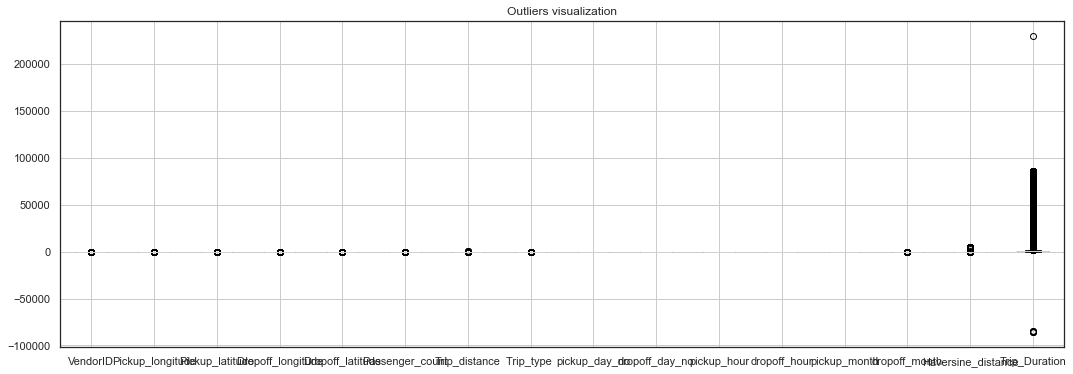

In [312]:
# Check trip duration outliers
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
train_df.boxplot();

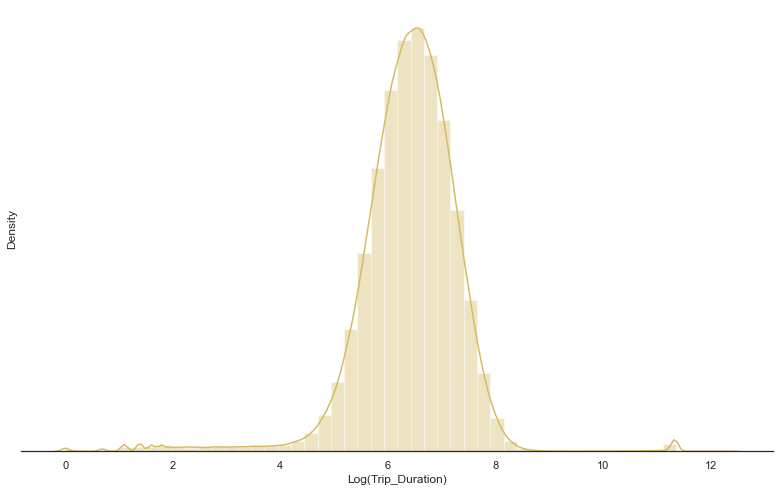

In [313]:
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['Trip_Duration'].values+1), axlabel = 'Log(Trip_Duration)', label = 'log(Trip_Duration)', bins = 50, color="y")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

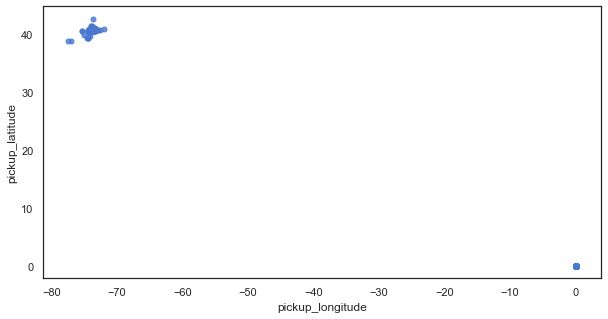

In [314]:
#Plot pickup positions
pickup_longitude = list(train_df.Pickup_longitude)
pickup_latitude = list(train_df.Pickup_latitude)
plt.subplots(figsize=(10,5))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 0.8, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

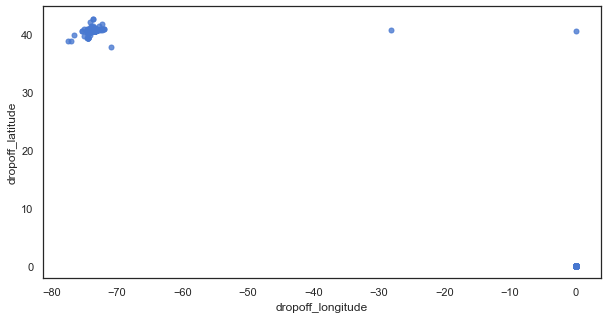

In [315]:
#Plot Dropoff positions
dropoff_longitude = list(train_df.Dropoff_longitude)
dropoff_latitude = list(train_df.Dropoff_latitude)
plt.subplots(figsize=(10,5))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 0.8, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [316]:
#Drop outliers from trip_duration
round(train_df["Trip_Duration"].describe([0.99,0.995,0.998]))

count    936429.0
mean       1018.0
std        4266.0
min      -86160.0
50%         633.0
99%        3172.0
99.5%      4048.0
99.8%     82826.0
max      230302.0
Name: Trip_Duration, dtype: float64

In [317]:
train_df = train_df[(train_df.Trip_Duration < 4000)]

In [318]:
# Keep Passanger > 0
train_df = train_df[(train_df.Passenger_count > 0)]

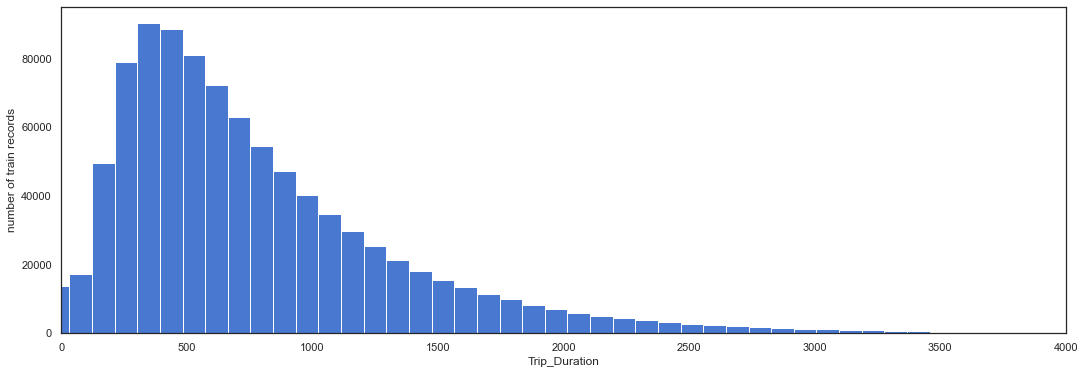

In [319]:
#Visualize the distribution of trip_duration values
plt.subplots(figsize=(18,6))
plt.xlim(0,4000)
plt.hist(train_df['Trip_Duration'].values, bins=1000,color="b")
plt.xlabel('Trip_Duration')
plt.ylabel('number of train records')
plt.show()

In [327]:
train_df['trip_duration'] = np.log(train_df['Trip_Duration'].values)
train_df['trip_duration']= np.isfinite(train_df['trip_duration'])
train_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Haversine_distance,Trip_Duration,trip_duration,speed
699119,2,2014-06-16 13:03:51,2014-06-16 13:15:06,N,-73.936501,40.849419,-73.930954,40.858013,1,1.54,...,13,13,6,6,Afternoon,Afternoon,0.660796,675.0,True,0.101431
1227189,2,2014-06-28 15:21:15,2014-06-28 15:26:31,N,-73.980286,40.676540,-73.978004,40.685013,1,0.66,...,15,15,6,6,Afternoon,Afternoon,0.597468,316.0,True,0.103804
789090,2,2014-06-18 19:58:27,2014-06-18 20:16:45,N,-73.993111,40.695255,-73.977753,40.663651,1,3.10,...,19,20,6,6,Evening,Evening,2.327242,1098.0,True,0.332404
566866,2,2014-06-13 21:15:37,2014-06-13 21:21:48,N,-73.955734,40.812729,-73.941948,40.806847,1,1.01,...,21,21,6,6,Evening,Evening,0.827630,371.0,True,0.139892
607896,2,2014-06-14 16:53:40,2014-06-14 16:54:59,N,-73.921616,40.828575,-73.920731,40.830200,5,0.11,...,16,16,6,6,Evening,Evening,0.121441,79.0,True,0.027793


In [328]:
# haversine distance outliers
round(train_df.Haversine_distance.describe([0.998,0.99999,0.999995]))

count       931456.0
mean            12.0
std            228.0
min              0.0
50%              2.0
99.8%           17.0
99.999%       5386.0
99.9995%      5386.0
max           5386.0
Name: Haversine_distance, dtype: float64

In [329]:
train_df = train_df[(train_df.Haversine_distance < 5386)]

In [331]:
# Add Speed
train_df['speed'] = train_df.Haversine_distance / np.log(train_df.Trip_Duration)
train_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Haversine_distance,Trip_Duration,trip_duration,speed
699119,2,2014-06-16 13:03:51,2014-06-16 13:15:06,N,-73.936501,40.849419,-73.930954,40.858013,1,1.54,...,13,13,6,6,Afternoon,Afternoon,0.660796,675.0,True,0.101431
1227189,2,2014-06-28 15:21:15,2014-06-28 15:26:31,N,-73.980286,40.676540,-73.978004,40.685013,1,0.66,...,15,15,6,6,Afternoon,Afternoon,0.597468,316.0,True,0.103804
789090,2,2014-06-18 19:58:27,2014-06-18 20:16:45,N,-73.993111,40.695255,-73.977753,40.663651,1,3.10,...,19,20,6,6,Evening,Evening,2.327242,1098.0,True,0.332404
566866,2,2014-06-13 21:15:37,2014-06-13 21:21:48,N,-73.955734,40.812729,-73.941948,40.806847,1,1.01,...,21,21,6,6,Evening,Evening,0.827630,371.0,True,0.139892
607896,2,2014-06-14 16:53:40,2014-06-14 16:54:59,N,-73.921616,40.828575,-73.920731,40.830200,5,0.11,...,16,16,6,6,Evening,Evening,0.121441,79.0,True,0.027793


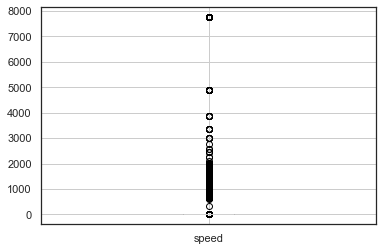

In [332]:
train_df.boxplot(column='speed', return_type='axes');

In [333]:
round(train_df.speed.describe([0.9992,0.99999,0.999995]))

count       931437.0
mean             inf
std              NaN
min              0.0
50%              0.0
99.92%        1179.0
99.999%          NaN
99.9995%         NaN
max              inf
Name: speed, dtype: float64

In [334]:
train_df = train_df[(train_df.speed < 21)]

In [335]:
# Add weekday/weekend Boolean
train_df["weekday_weekend"]=np.where(train_df['pickup_day_no']>4,0,1)
test_df["weekday_weekend"]=np.where(test_df['pickup_day_no']>4,0,1)
train_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,Haversine_distance,Trip_Duration,trip_duration,speed,weekday_weekend
699119,2,2014-06-16 13:03:51,2014-06-16 13:15:06,N,-73.936501,40.849419,-73.930954,40.858013,1,1.54,...,13,6,6,Afternoon,Afternoon,0.660796,675.0,True,0.101431,1
1227189,2,2014-06-28 15:21:15,2014-06-28 15:26:31,N,-73.980286,40.676540,-73.978004,40.685013,1,0.66,...,15,6,6,Afternoon,Afternoon,0.597468,316.0,True,0.103804,0
789090,2,2014-06-18 19:58:27,2014-06-18 20:16:45,N,-73.993111,40.695255,-73.977753,40.663651,1,3.10,...,20,6,6,Evening,Evening,2.327242,1098.0,True,0.332404,1
566866,2,2014-06-13 21:15:37,2014-06-13 21:21:48,N,-73.955734,40.812729,-73.941948,40.806847,1,1.01,...,21,6,6,Evening,Evening,0.827630,371.0,True,0.139892,1
607896,2,2014-06-14 16:53:40,2014-06-14 16:54:59,N,-73.921616,40.828575,-73.920731,40.830200,5,0.11,...,16,6,6,Evening,Evening,0.121441,79.0,True,0.027793,0


# Encoding

In [336]:
train_df=pd.get_dummies(train_df, columns=["VendorID"], prefix=["Vendor"])
train_df=pd.get_dummies(train_df, columns=["Store_and_fwd_flag"], prefix=["Store_and_fwd_flag"])

In [337]:
test_df=pd.get_dummies(test_df, columns=["VendorID"], prefix=["Vendor"])
test_df=pd.get_dummies(test_df, columns=["Store_and_fwd_flag"], prefix=["Store_and_fwd_flag"])

In [338]:
# Add direction values 0 to 7
# ["north","north east","east","south east","south","south west","west","north west"]
import math
def calcBearing (lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    bearing = math.atan2(x,y)   # use atan2 to determine the quadrant
    bearing = math.degrees(bearing)
    bearing += 22.5
    bearing = bearing % 360
    bearing = int(bearing / 45) # values 0 to 7 ["north", "north east", "east", "south east", "south", "south west", "west", "north west"]
    return bearing

In [339]:
t = lambda train_df: calcBearing(train_df.Pickup_latitude,train_df.Pickup_longitude,train_df.Dropoff_latitude,train_df.Dropoff_longitude,)
train_df["direction"] = train_df.apply(t, axis=1)

f = lambda test_df: calcBearing(test_df.Pickup_latitude,test_df.Pickup_longitude,test_df.Dropoff_latitude,test_df.Dropoff_longitude,)
test_df["direction"] = test_df.apply(f, axis=1)

In [340]:
train_df.dtypes

lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Trip_type                       float64
pickup_day                       object
dropoff_day                      object
pickup_day_no                     int64
dropoff_day_no                    int64
pickup_hour                       int64
dropoff_hour                      int64
pickup_month                      int64
dropoff_month                     int64
pickup_timeofday                 object
dropoff_timeofday                object
Haversine_distance              float64
Trip_Duration                   float64
trip_duration                      bool
speed                           float64
weekday_weekend                   int32
Vendor_1                          uint8


In [341]:
y_train = train_df["trip_duration"]

In [342]:
features=["Passenger_count","pickup_day_no","Haversine_distance",\
          "weekday_weekend","pickup_hour","direction","Vendor_1","Vendor_2","Store_and_fwd_flag_N","Store_and_fwd_flag_Y"]

In [343]:
X_train=train_df[features]
X_test=test_df[features]

In [344]:
X_train.shape

(930080, 10)

# Model_XGBoost

In [345]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [346]:
xgb = XGBRegressor(n_jobs=-1)
cross_val_score(xgb, X_train, y_train, scoring='r2', cv=5)

array([0.91620819, 0.87757128, 0.90522862, 0.89837954, 0.94426772])

In [347]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [348]:
y_pred = xgb.predict(X_test)

In [349]:
test_df['pred_trip_duration']=np.exp(y_pred)
test_df.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Trip_type,pickup_day,...,dropoff_timeofday,Haversine_distance,Trip_Duration,weekday_weekend,Vendor_1,Vendor_2,Store_and_fwd_flag_N,Store_and_fwd_flag_Y,direction,pred_trip_duration
886690,2014-06-20 22:43:24,2014-06-20 23:08:08,-73.927216,40.810764,-73.857697,40.845707,1,4.76,1.0,Friday,...,Late night,4.363336,1484.0,1,0,1,1,0,1,2.718281
486940,2014-06-12 08:29:38,2014-06-12 08:41:55,-73.959595,40.801216,-73.965820,40.773773,1,2.35,1.0,Thursday,...,Morning,1.923892,737.0,1,0,1,1,0,4,2.718281
204964,2014-06-05 23:06:16,2014-06-05 23:13:21,-73.957336,40.725609,-73.956841,40.745564,1,1.96,1.0,Thursday,...,Late night,1.378982,425.0,1,0,1,1,0,0,2.718281
949864,2014-06-22 00:36:14,2014-06-22 00:43:10,-73.981262,40.675201,-73.992538,40.689800,5,1.60,1.0,Sunday,...,Late night,1.168983,416.0,0,0,1,1,0,7,2.718281
175651,2014-06-05 10:02:54,2014-06-05 10:27:19,-73.963348,40.712173,-73.987846,40.733463,1,3.51,1.0,Thursday,...,Morning,1.951773,1465.0,1,0,1,1,0,7,2.718281


In [350]:
test_df.to_csv('predict_duration.csv', index=False)